In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lxml

df = pd.read_csv('fatal-police-shootings-data.csv')

In [6]:
grouped = df.groupby(['race', 'signs_of_mental_illness']).size().reset_index(name='counts')
print(grouped)


   race  signs_of_mental_illness  counts
0     A                    False      69
1     A                     True      24
2     B                    False    1114
3     B                     True     184
4     H                    False     745
5     H                     True     157
6     N                    False      64
7     N                     True      14
8     O                    False      37
9     O                     True      11
10    W                    False    1763
11    W                     True     713


In [7]:
grouped_df = df.groupby(['race', 'signs_of_mental_illness']).size().reset_index(name='counts')

def odsetek(x):
    if x == True: 
        return 1
    else:
        return 0

grouped_df['odsetek'] = grouped_df['counts'] / grouped_df['counts'].sum()
grouped_df['odsetek_flag'] = grouped_df['signs_of_mental_illness'].apply(odsetek)
grouped_df['odsetek'] = grouped_df['odsetek'].apply(lambda x: '{:.2%}'.format(x))

grouped_df



,race,signs_of_mental_illness,counts,odsetek,odsetek_flag
0,A,False,69,1.41%,0
1,A,True,24,0.49%,1
2,B,False,1114,22.76%,0
3,B,True,184,3.76%,1
4,H,False,745,15.22%,0
5,H,True,157,3.21%,1
6,N,False,64,1.31%,0
7,N,True,14,0.29%,1
8,O,False,37,0.76%,0
9,O,True,11,0.22%,1


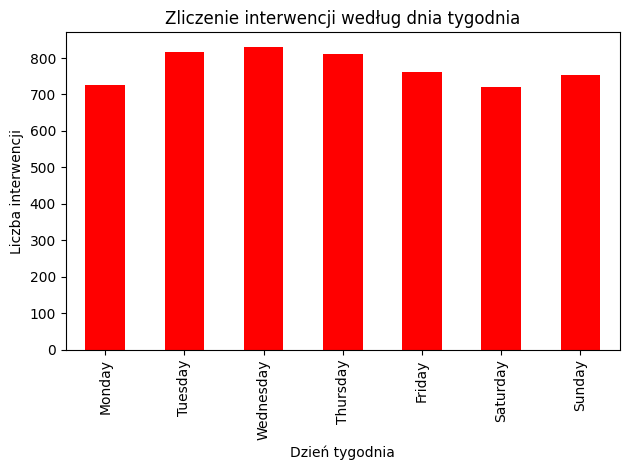

In [ ]:
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'])

df['day'] = df['date'].dt.day_name()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day'] = pd.Categorical(df['day'], categories=days_order, ordered=True)

day_counts = df['day'].value_counts().sort_index()

ax = day_counts.plot(kind='bar', color='red')
ax.set_title('Zliczenie interwencji według dnia tygodnia')
ax.set_xlabel('Dzień tygodnia')
ax.set_ylabel('Liczba interwencji')

plt.tight_layout()
plt.show()


In [ ]:
# Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów. Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów.
# Dane o śmiertelnych interwencjach wczytanie ich z pliku fatal-police-shootings-data.csv

fatal_df = pd.read_csv('fatal-police-shootings-data.csv')
fatal_df = fatal_df[['id', 'state']]
fatal_df.columns = ['id', 'kod_stanu']
fatal_df_grouped = fatal_df.groupby('kod_stanu').size().reset_index(name='counts')
fatal_df_grouped = fatal_df_grouped.sort_index(ascending=False)

# Wczytaj dane o populacji i skrótach stanów
terytorium_USA = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations')

# Wybierz odpowiednią tabelę z listy
terytorium_USA= terytorium_USA[1]
#  przefiltruj dane, aby wybrać tylko te, które mają status 'State'
# Filter the rows where the 'Status of region' column contains 'State'
df_filtered_terytorium = terytorium_USA[terytorium_USA[('Status of region', 'Status of region')].str.contains('State', na=False)]

# Select the required columns by their correct multi-level names
df_filtered_terytorium = df_filtered_terytorium[[('Name', 'Name'), ('ANSI', 'Unnamed: 3_level_1')]]

# Rename the columns for easier access
df_filtered_terytorium.columns = ['State Name', 'kod_stanu']

populacja_USA = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population')
populacja_USA = populacja_USA[0]
populacja_USA = populacja_USA[['State', 'Census population, April 1, 2020 [1][2]']]
# zmiana nazwy kolumny na 'Population'
populacja_USA.columns = ['State', 'Population']

# Połączenie danych o populacji i skrótach stanów i smierci interwencji
merged_df = pd.merge(df_filtered_terytorium, fatal_df_grouped, on='kod_stanu', how='inner')
merged_df = pd.merge(merged_df, populacja_USA, left_on='State Name', right_on='State', how='inner')
# Wybierz tylko kolumny, które są potrzebne do dalszej analizy
merged_df = merged_df[['State Name', 'kod_stanu','Population', 'counts']]
merged_df.columns = ['Nazwa Stanu', 'Kod Stanu','Populacja', 'Liczba śmiertelnych interwencji w stanie']
# Dodaj kolumnę z liczbą interwencji w przeliczeniu na 1000 mieszkańców
merged_df['Interwencje na 1000 mieszkańców'] = (merged_df['Liczba śmiertelnych interwencji w stanie'] / merged_df['Populacja']) * 1000
merged_df['Interwencje na 1000 mieszkańców'] = merged_df['Interwencje na 1000 mieszkańców'].apply(lambda x: '{:.2f}'.format(x))
# Sortowanie danych według liczby interwencji na 1000 mieszkańców
merged_df = merged_df.sort_values(by='Interwencje na 1000 mieszkańców', ascending=False)
# Wybierz tylko 50 pierwszych stanów
merged_df = merged_df.head(50)
merged_df

,Nazwa Stanu,Kod Stanu,Populacja,Liczba śmiertelnych interwencji w stanie,Interwencje na 1000 mieszkańców
1,Alaska,AK,733391,39,0.05
30,New Mexico,NM,2117522,106,0.05
2,Arizona,AZ,7151502,254,0.04
35,Oklahoma,OK,3959353,164,0.04
25,Montana,MT,1084225,31,0.03
3,Arkansas,AR,3011524,83,0.03
5,Colorado,CO,5773714,195,0.03
47,West Virginia,WV,1793716,54,0.03
27,Nevada,NV,3104614,96,0.03
39,South Carolina,SC,5118425,88,0.02
